In [177]:
import numpy as np
import scipy as sp
from skimage.transform import resize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

datapath_input = "datasets/livneh/"


In [178]:
file_path = datapath_input + "trainB.npz"
x = np.load(file_path)
data = np.nan_to_num(x['data'])

arr = np.nan_to_num(data)
arr.shape

(3214, 321, 321, 1)

0.8601568734123252


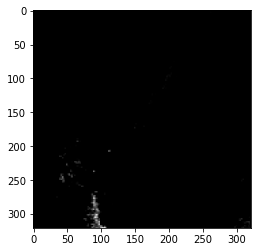

In [194]:
print(np.sum(arr == 0)/arr.size)

plt.imshow(arr[2000,:,:,0], cmap = 'gray')

In [258]:
file_path = datapath_input + "trainB.npz"
x = np.load(file_path)
data = np.nan_to_num(x['data'])

arr = np.nan_to_num(data)
if arr.ndim == 3:
    arr = np.expand_dims(arr, axis=2)
means = np.nanmean(arr, axis=(0,1,2))
# scale and shift to [-1,1]
#arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
#arr = np.nan_to_num(arr); arr[arr == np.inf] = 0; arr[arr == -np.inf] = 0

In [259]:
max_vals = []
min_vals = []
avg_vals = []
frac_zeros = []

for i in range(0, 3214):
    max_vals.append(np.max(arr[i,:,:,0]))
    min_vals.append(np.min(arr[i,:,:,0]))
    avg_vals.append(np.mean(arr[i,:,:,0]))
    frac_zeros.append(np.sum(arr[i,:,:,0] == 0)/(321**2))


In [261]:
np.sum(np.array(frac_zeros) > 0.999)

543

In [207]:
np.where(np.array(frac_zeros) == 1)

(array([2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066,
        2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077,
        2078, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2092,
        2093, 2094, 2095, 2096, 2097, 2098, 2100, 2404, 2405, 2406, 2407,
        2408, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421,
        2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432,
        2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443,
        2444, 2445, 2446, 2447, 2449, 2450, 2451, 2452, 2453, 2454, 2455,
        2456, 2457, 2458, 2459, 2460, 2461, 2462]),)

In [262]:
file_path = datapath_input + "trainB.npz"
x = np.load(file_path)
data = np.nan_to_num(x['data'])

arr = np.nan_to_num(data)
if arr.ndim == 3:
    arr = np.expand_dims(arr, axis=2)
means = np.nanmean(arr, axis=(0,1,2))
#scale and shift to [-1,1]
arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
arr[arr == np.inf] = 1; arr[arr == -np.inf] = -1; arr[np.isnan(arr)] = -1
new_arr = []
    #print "Resizing data to %d" % grid_size
for x in arr:
    new_arr.append(resize(x, (64,64)))
arr = np.stack(new_arr)
arr = arr.astype('float32')

/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [263]:
max_vals = []
min_vals = []
avg_vals = []
frac_zeros = []
for i in range(0, 3214):
    max_vals.append(np.max(arr[i,:,:,0]))
    min_vals.append(np.min(arr[i,:,:,0]))
    avg_vals.append(np.mean(arr[i,:,:,0]))
    frac_zeros.append(np.sum(arr[i,:,:,0] == -1)/(64**2))


In [264]:
np.sum(np.array(frac_zeros) == 1)

110

In [265]:
np.where(np.array(frac_zeros) == 1)

(array([2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055,
        2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066,
        2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077,
        2078, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089,
        2090, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2403,
        2404, 2405, 2406, 2407, 2408, 2412, 2413, 2414, 2415, 2416, 2417,
        2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428,
        2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439,
        2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2449, 2450, 2451,
        2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462]),)

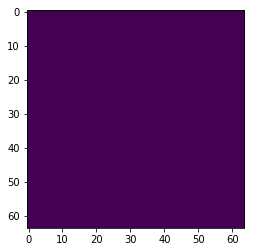

In [173]:
file_path = datapath_input + str(200) + ".npz"
x = np.load(file_path)
data = np.nan_to_num(x['data'])

arr = np.nan_to_num(data)

(arr - arr.min((1,2))[:, np.newaxis,np.newaxis]).shape

(321, 321, 1)

In [175]:
arr.max()

1238.9594

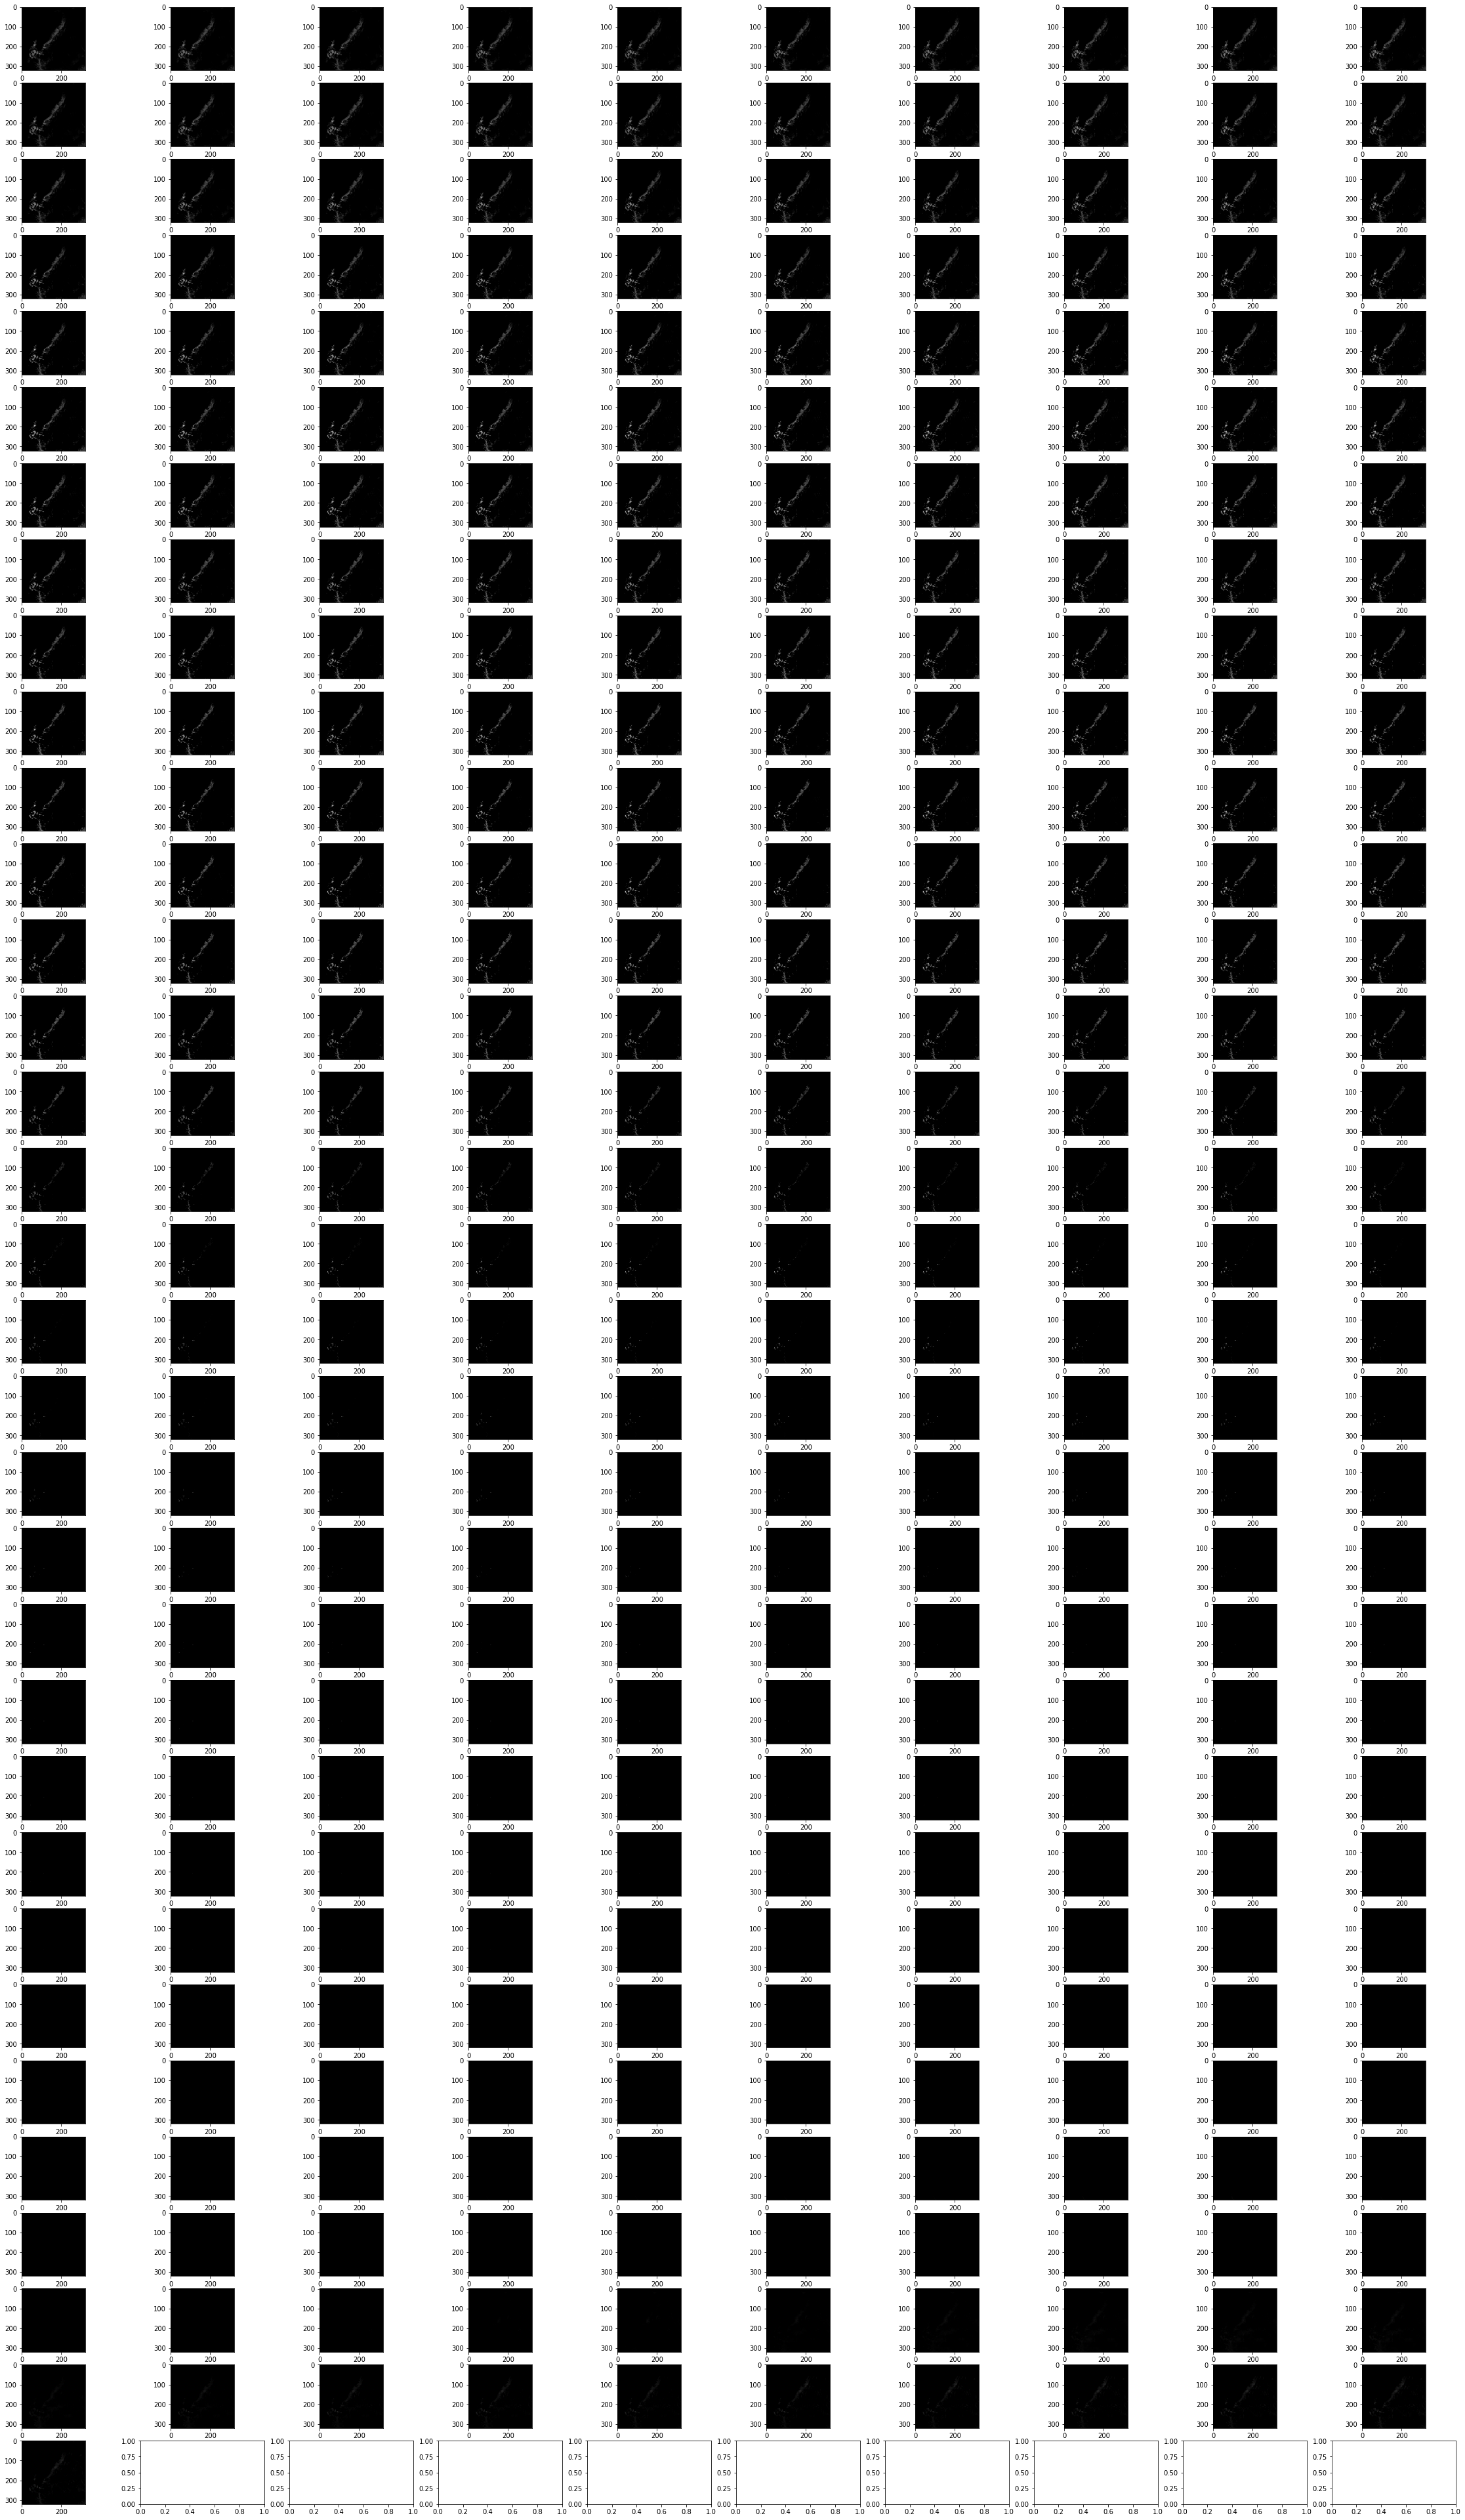

In [134]:
plt.rcParams["figure.figsize"] = [40,70]
f, axarr = plt.subplots(33, 10)
for i in range(0, 321):
    file_path = datapath_input + str(i) + ".npz"
    x = np.load(file_path)
    data = np.nan_to_num(x['data'])
    
    arr = np.nan_to_num(data)
#     if arr.ndim == 3:
#         arr = np.expand_dims(arr, axis=2)
#     means = np.nanmean(arr, axis=(0,1,2))
#     # scale and shift to [-1,1]
#     arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
#     arr = np.nan_to_num(arr); arr[arr == np.inf] = 0; arr[arr == -np.inf] = 0
    arr = arr[:,:,0]
    #print(arr.shape)
    

    #arr = arr.astype('float32')
    #print(i%10, i//10)
    axarr[i//10, i%10].imshow(arr, cmap = 'gray')
    

/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


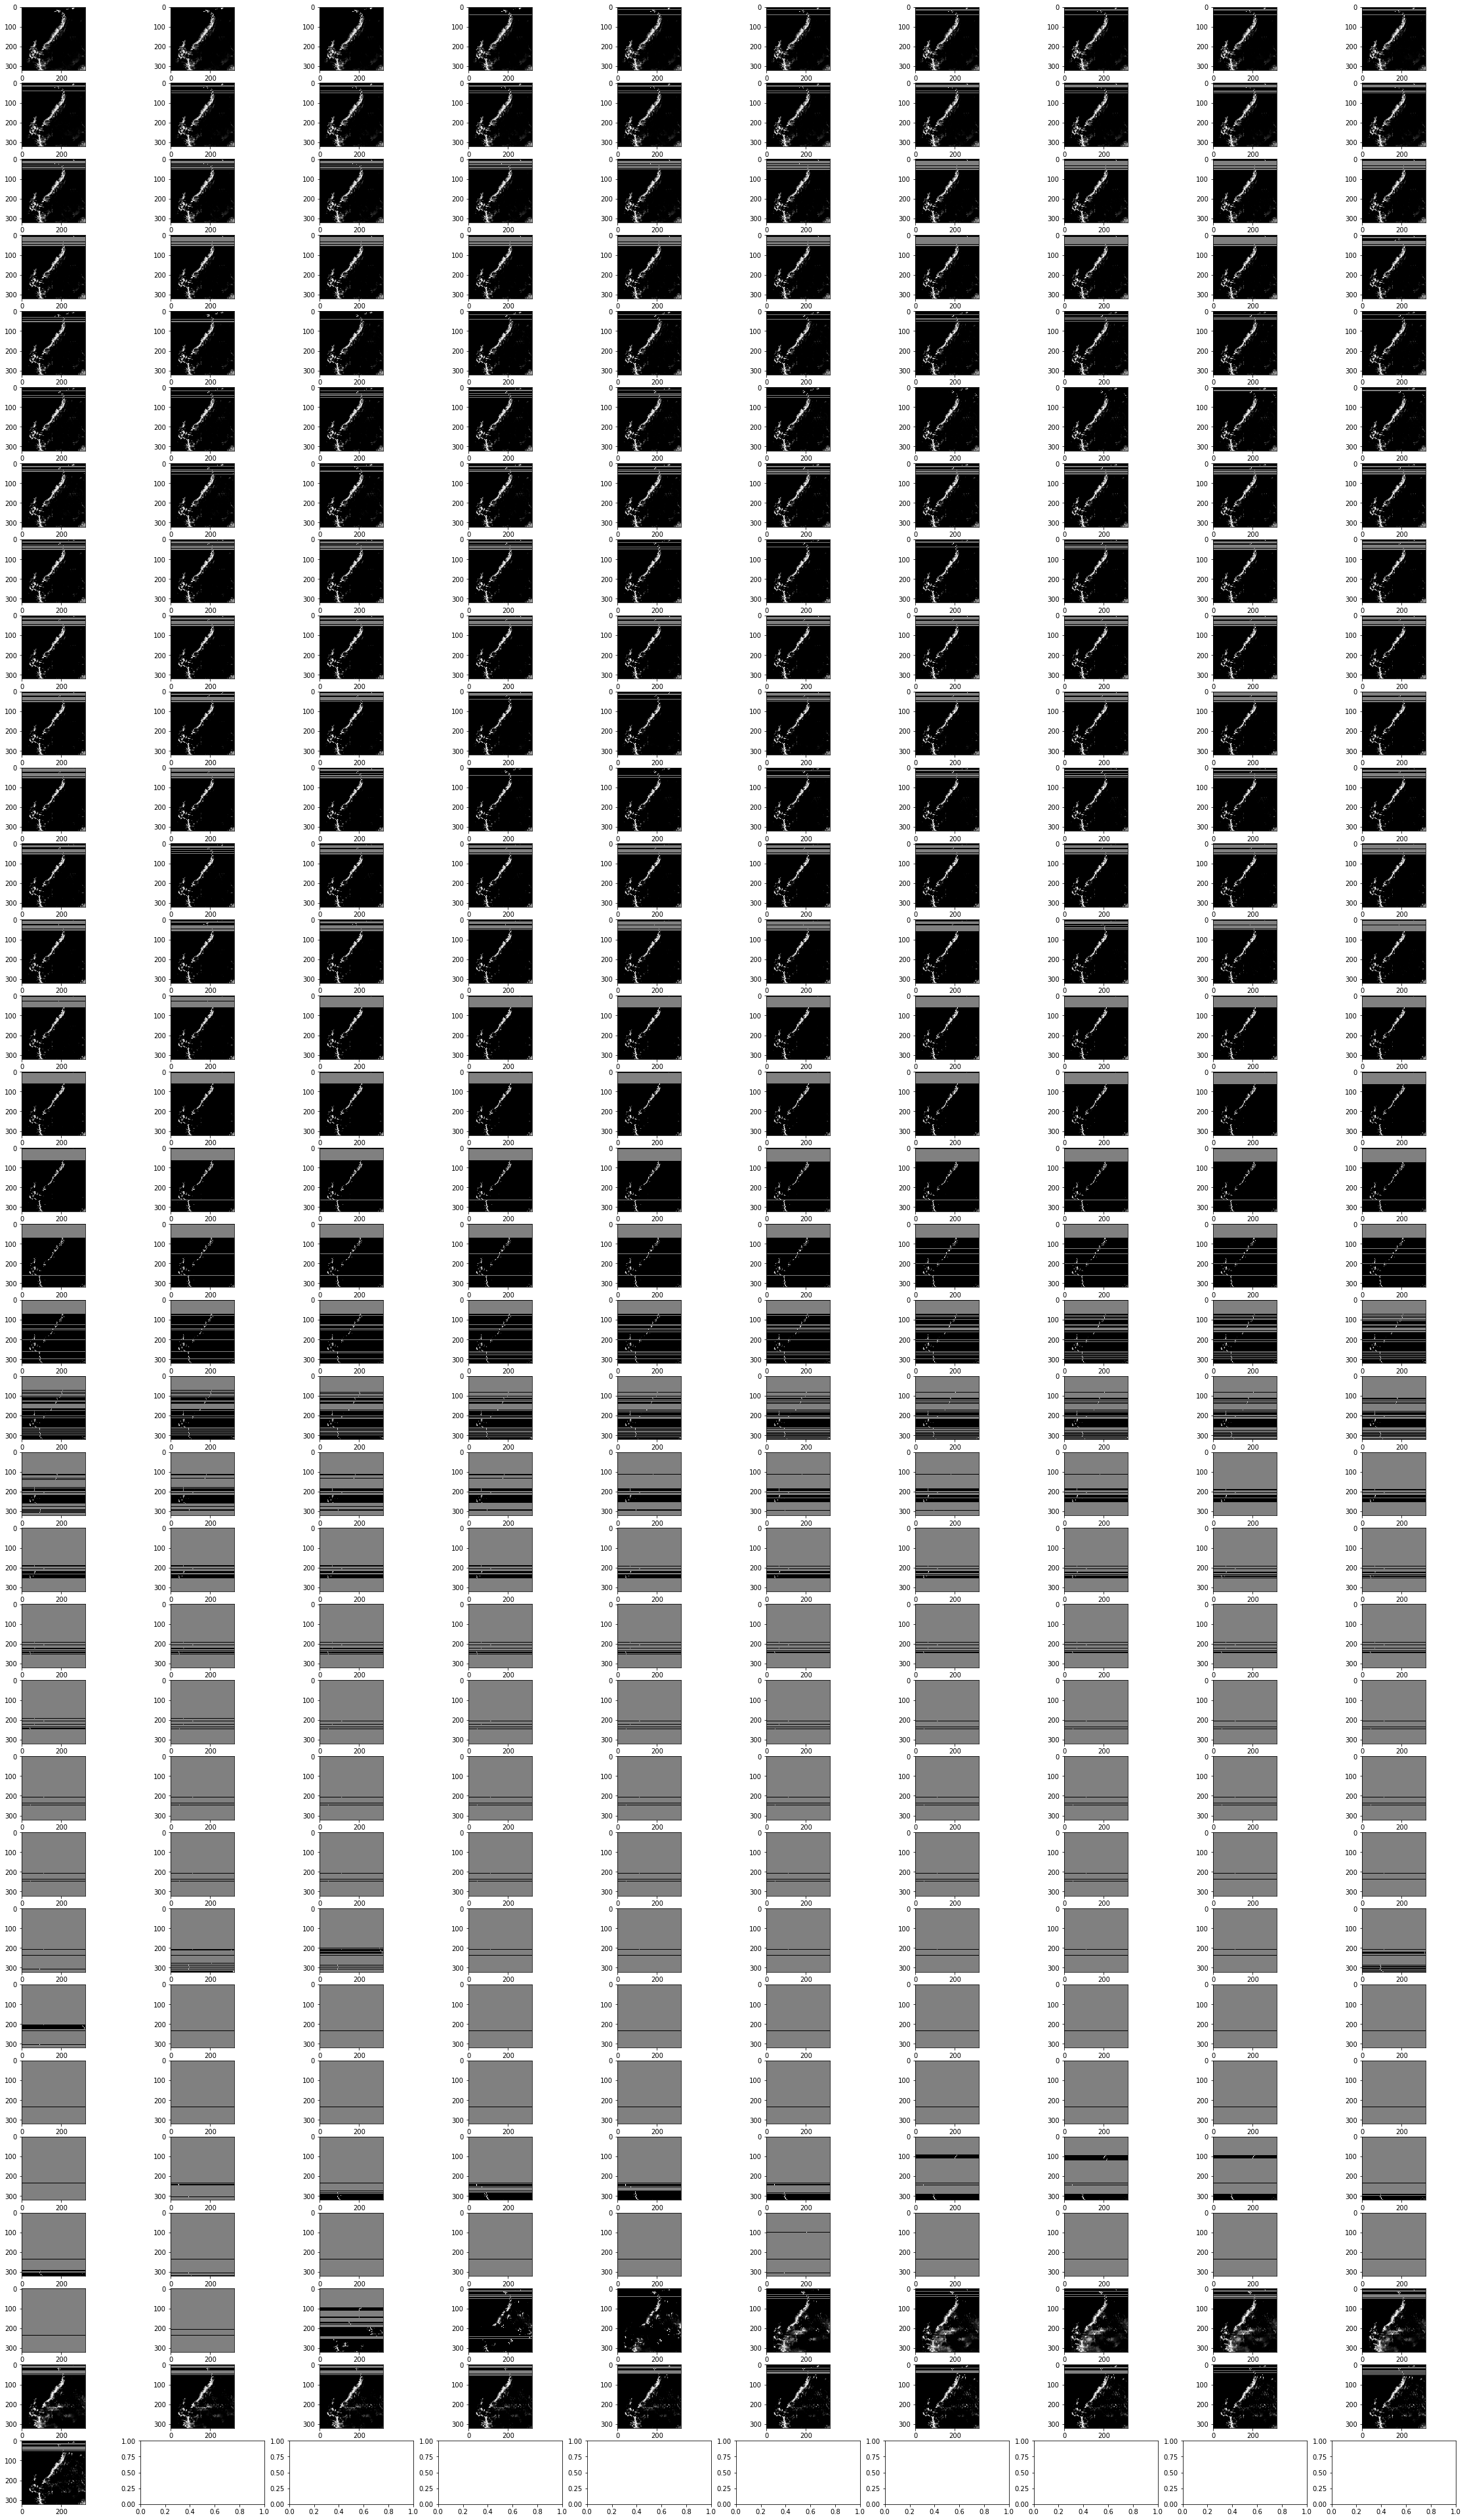

In [135]:
plt.rcParams["figure.figsize"] = [40,70]
f, axarr = plt.subplots(33, 10)
for i in range(0, 321):
    file_path = datapath_input + str(i) + ".npz"
    x = np.load(file_path)
    data = np.nan_to_num(x['data'])
    
    arr = np.nan_to_num(data)
    if arr.ndim == 3:
        arr = np.expand_dims(arr, axis=2)
    means = np.nanmean(arr, axis=(0,1,2))
    # scale and shift to [-1,1]
    arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
    arr = np.nan_to_num(arr); arr[arr == np.inf] = 0; arr[arr == -np.inf] = 0
    arr = arr[:,:,0,0]
    #print(arr.shape)
    

    arr = arr.astype('float32')
    #print(i%10, i//10)
    axarr[i//10, i%10].imshow(arr, cmap = 'gray')
    

/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


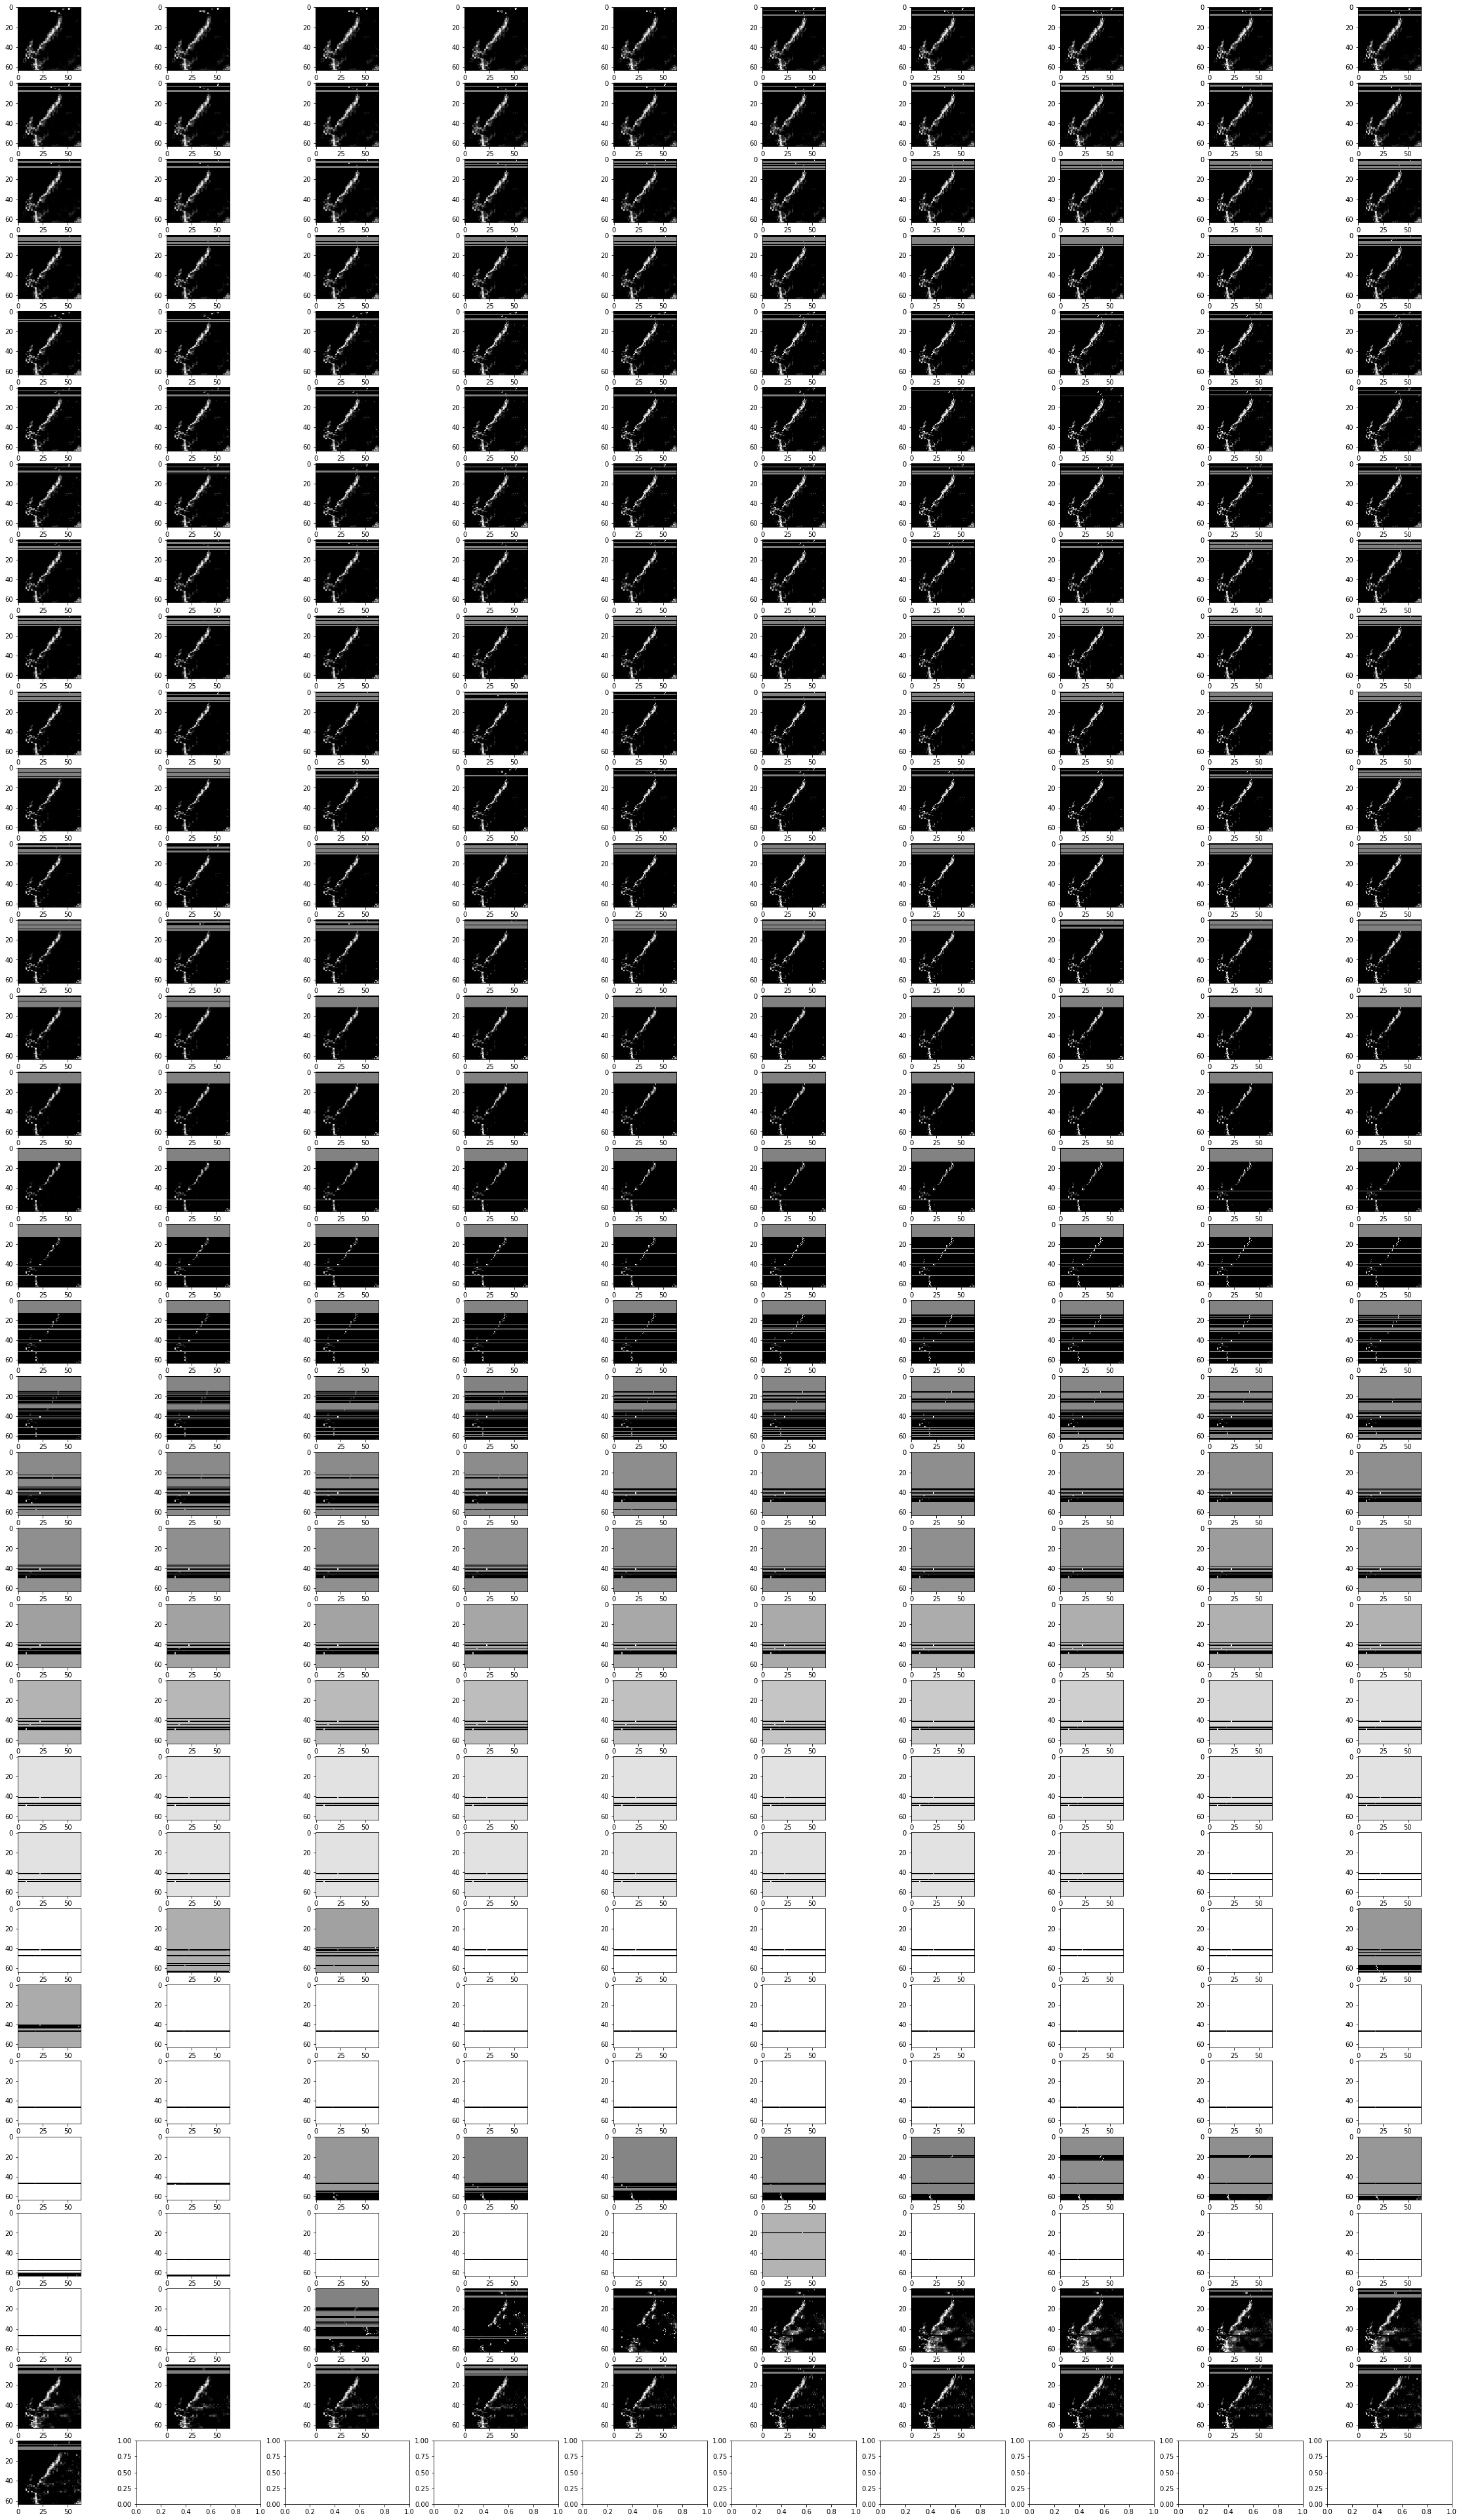

In [132]:
plt.rcParams["figure.figsize"] = [40,70]
f, axarr = plt.subplots(33, 10)
for i in range(0, 321):
    file_path = datapath_input + str(i) + ".npz"
    x = np.load(file_path)
    data = np.nan_to_num(x['data'])
    
    arr = np.nan_to_num(data)
    if arr.ndim == 3:
        arr = np.expand_dims(arr, axis=2)
    means = np.nanmean(arr, axis=(0,1,2))
    # scale and shift to [-1,1]
    arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
    arr = np.nan_to_num(arr); arr[arr == np.inf] = 0; arr[arr == -np.inf] = 0
    arr = arr[:,:,0,0]
    #print(arr.shape)
    arr = resize(arr, (64, 64))
    
    #print(i%10, i//10)
    axarr[i//10, i%10].imshow(arr, cmap = 'gray')
    

In [101]:
datapath_input = "datasets/livneh/trainB/"
avg_vals = []
signal_fraction = []
min_vals = []
max_vals = []



for i in range(0, 321):
    file_path = datapath_input + str(i) + ".npz"
    x = np.load(file_path)
    data = np.nan_to_num(x['data'])
    
    arr = np.nan_to_num(data)
    if arr.ndim == 3:
        arr = np.expand_dims(arr, axis=2)
    means = np.nanmean(arr, axis=(0,1,2))
    # scale and shift to [-1,1]
    arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
    arr = np.nan_to_num(arr); arr[arr == np.inf] = 0; arr[arr == -np.inf] = 0
    arr = arr[:,:,0,0]
    #print(arr.shape)
    arr = resize(arr, (64, 64))
    

    arr = arr.astype('float32')
    signal_fraction.append(np.sum(arr == sp.stats.mode(arr))/(64**2))
    avg_vals.append(np.mean(arr))
    min_vals.append(np.min(arr))
    max_vals.append(np.max(arr))
    
    
    


/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


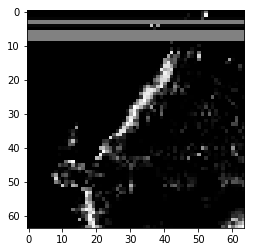

In [121]:
plt.imshow(arr, cmap = 'gray')

/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/ashray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


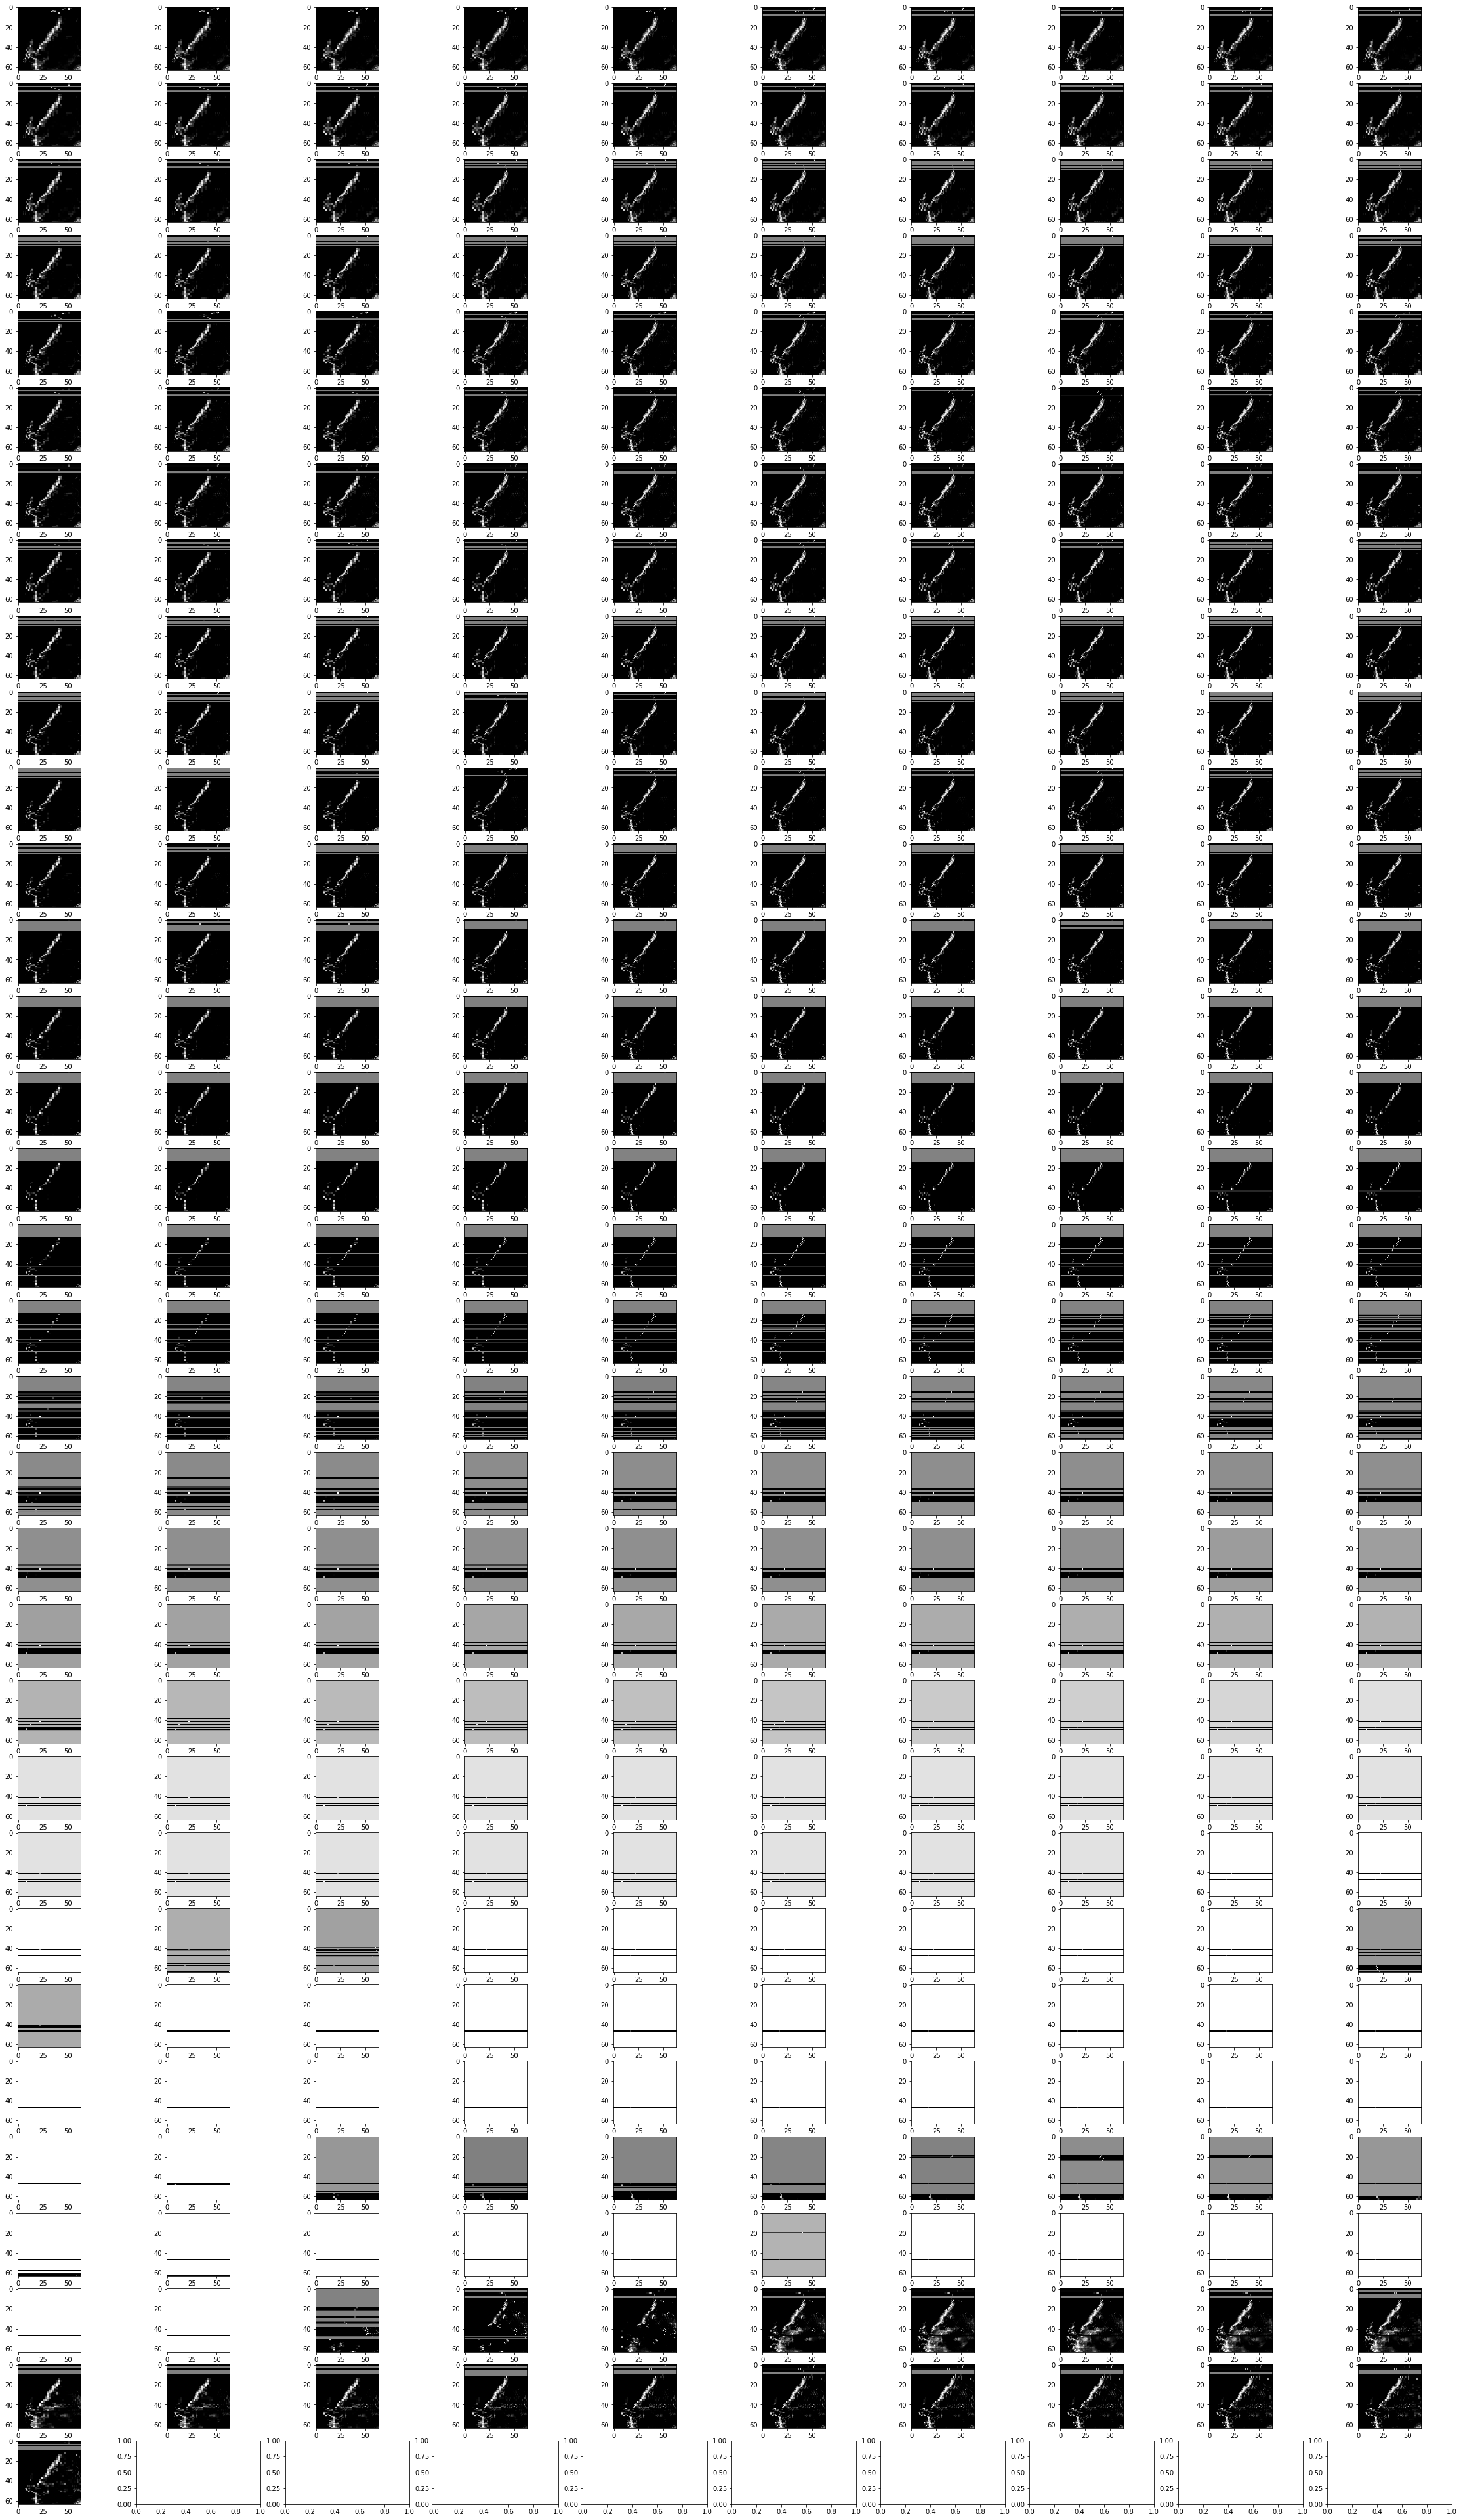

In [130]:
plt.rcParams["figure.figsize"] = [40,70]
f, axarr = plt.subplots(33, 10)
for i in range(0, 321):
    file_path = datapath_input + str(i) + ".npz"
    x = np.load(file_path)
    data = np.nan_to_num(x['data'])
    
    arr = np.nan_to_num(data)
    if arr.ndim == 3:
        arr = np.expand_dims(arr, axis=2)
    means = np.nanmean(arr, axis=(0,1,2))
    # scale and shift to [-1,1]
    arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
    arr = np.nan_to_num(arr); arr[arr == np.inf] = 0; arr[arr == -np.inf] = 0
    arr = arr[:,:,0,0]
    #print(arr.shape)
    arr = resize(arr, (64, 64))
    

    arr = arr.astype('float32')
    #print(i%10, i//10)
    axarr[i//10, i%10].imshow(arr, cmap = 'gray')
    

In [137]:
arr.max((1,2))

AxisError: axis 2 is out of bounds for array of dimension 2

In [89]:
avg_vals = []
frac_zeros = []



for i in range(0, 321):
    file_path = datapath_input + str(i) + ".npz"
    x = np.load(file_path)
    data = resize(np.nan_to_num(x['data']), (64,64))
    avg_vals.append(np.mean(data))
    frac_zeros.append(np.sum(data == 0)/(64*64))


In [90]:
print(avg_vals)

[28.371157337522433, 28.426144283278663, 28.26514505402657, 27.942484616298174, 27.76049974260477, 27.409578350034735, 27.102013122637075, 27.00863288918184, 27.378273483921287, 28.056443742712165, 28.578797733500316, 28.81205484048606, 29.151136021982104, 29.41329062379898, 29.546416718003304, 29.450735987500167, 29.24568725202338, 28.988091784614674, 28.816348246000846, 28.795089305594118, 28.832191260463603, 28.800323588110004, 28.706911589174705, 28.877973095790352, 28.760277313535425, 28.15682503788288, 28.067363904584706, 28.177675736575495, 28.376041557205255, 28.100833491472727, 27.47453715690612, 27.34912551952796, 27.33808484465449, 27.37927032006575, 27.349094008035166, 27.30861988659892, 27.251690640066062, 27.19327891440095, 27.16062892036414, 27.115702182165073, 27.061465566508378, 27.100804000804416, 27.95739723076187, 28.648370588776583, 28.775031865740857, 29.1645502974735, 29.771582687833668, 29.953939209823798, 30.228434055419292, 30.558681853197605, 30.6327020616118

In [91]:
max(frac_zeros)

0.999755859375